## ÁRBOL DE DECISIÓN

In [45]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
# Cargar los datos
data = pd.read_csv("winequality-red.csv")

In [10]:
# Mostrar las primeras filas del conjunto de datos para una inspección inicial
print("Primeras filas del conjunto de datos:")
print(data.head())

Primeras filas del conjunto de datos:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1   

In [12]:
# Dimensiones del conjunto de datos
print("\nDimensiones del conjunto de datos:")
print(data.shape)


Dimensiones del conjunto de datos:
(1599, 12)


In [14]:
# Estadísticas descriptivas del conjunto de datos
print("\nEstadísticas descriptivas del conjunto de datos:")
print(data.describe())


Estadísticas descriptivas del conjunto de datos:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887  

In [16]:
# Revisión de valores nulos
print("\nRevisión de valores nulos en el conjunto de datos:")
print(data.isnull().sum())


Revisión de valores nulos en el conjunto de datos:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64



Histogramas para cada característica:


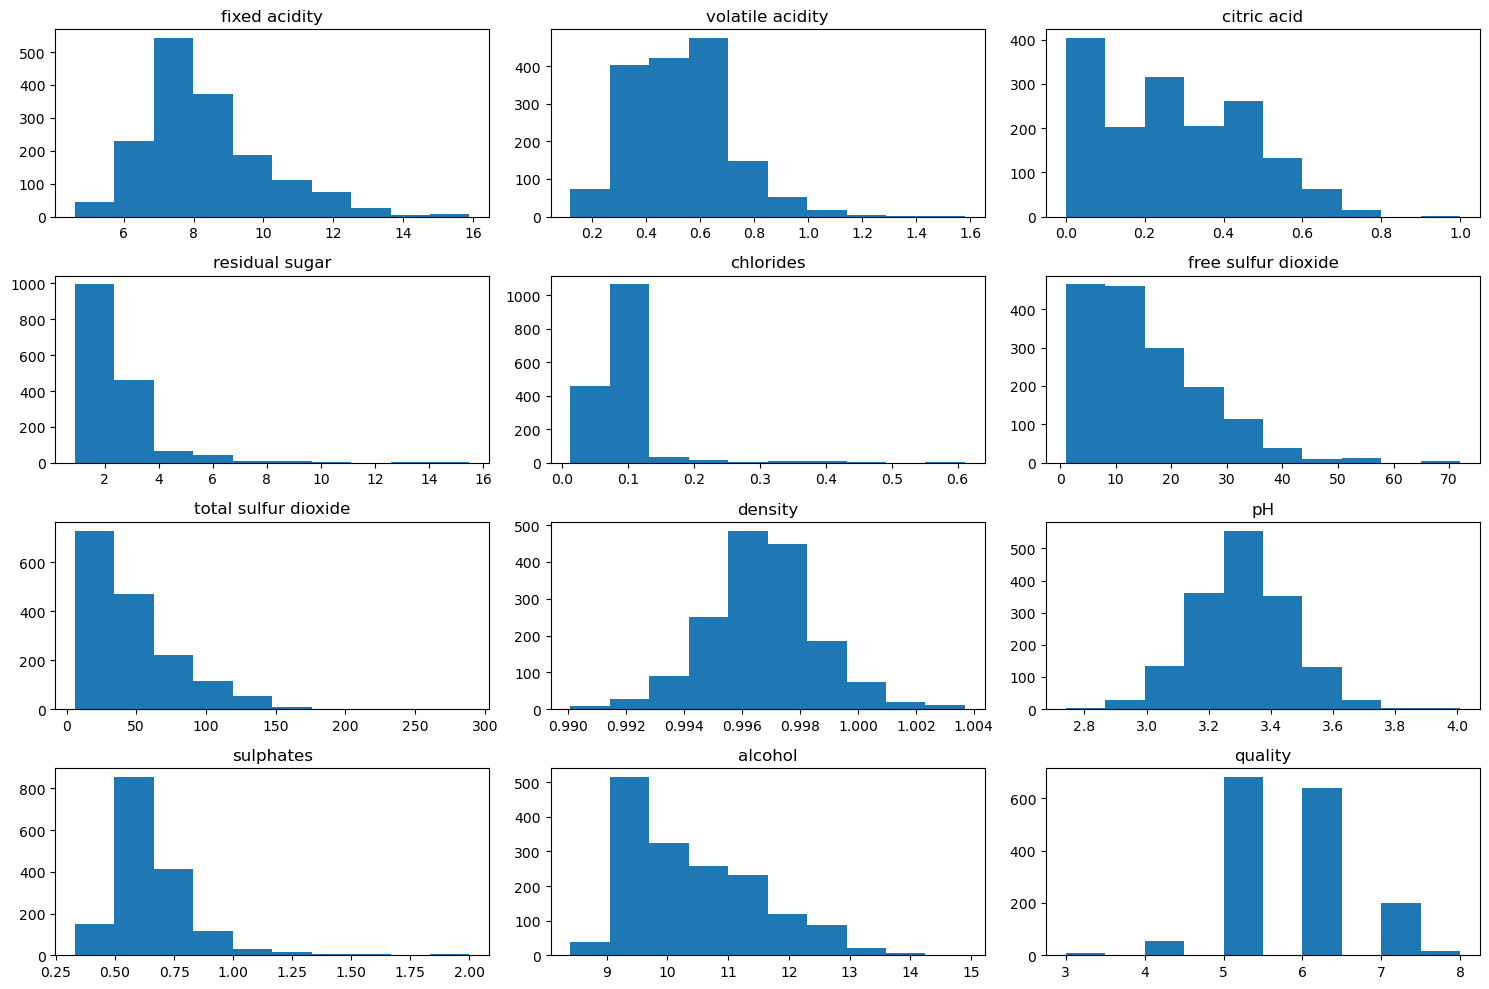

In [18]:
# Histogramas para cada característica para visualizar las distribuciones
print("\nHistogramas para cada característica:")
data.hist(bins=10, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

## Los histogramas muestran la distribución de cada variable, donde se observa que la variable 'alcohol' tiene una distribución levemente sesgada hacia la derecha



Diagramas de caja para cada característica:


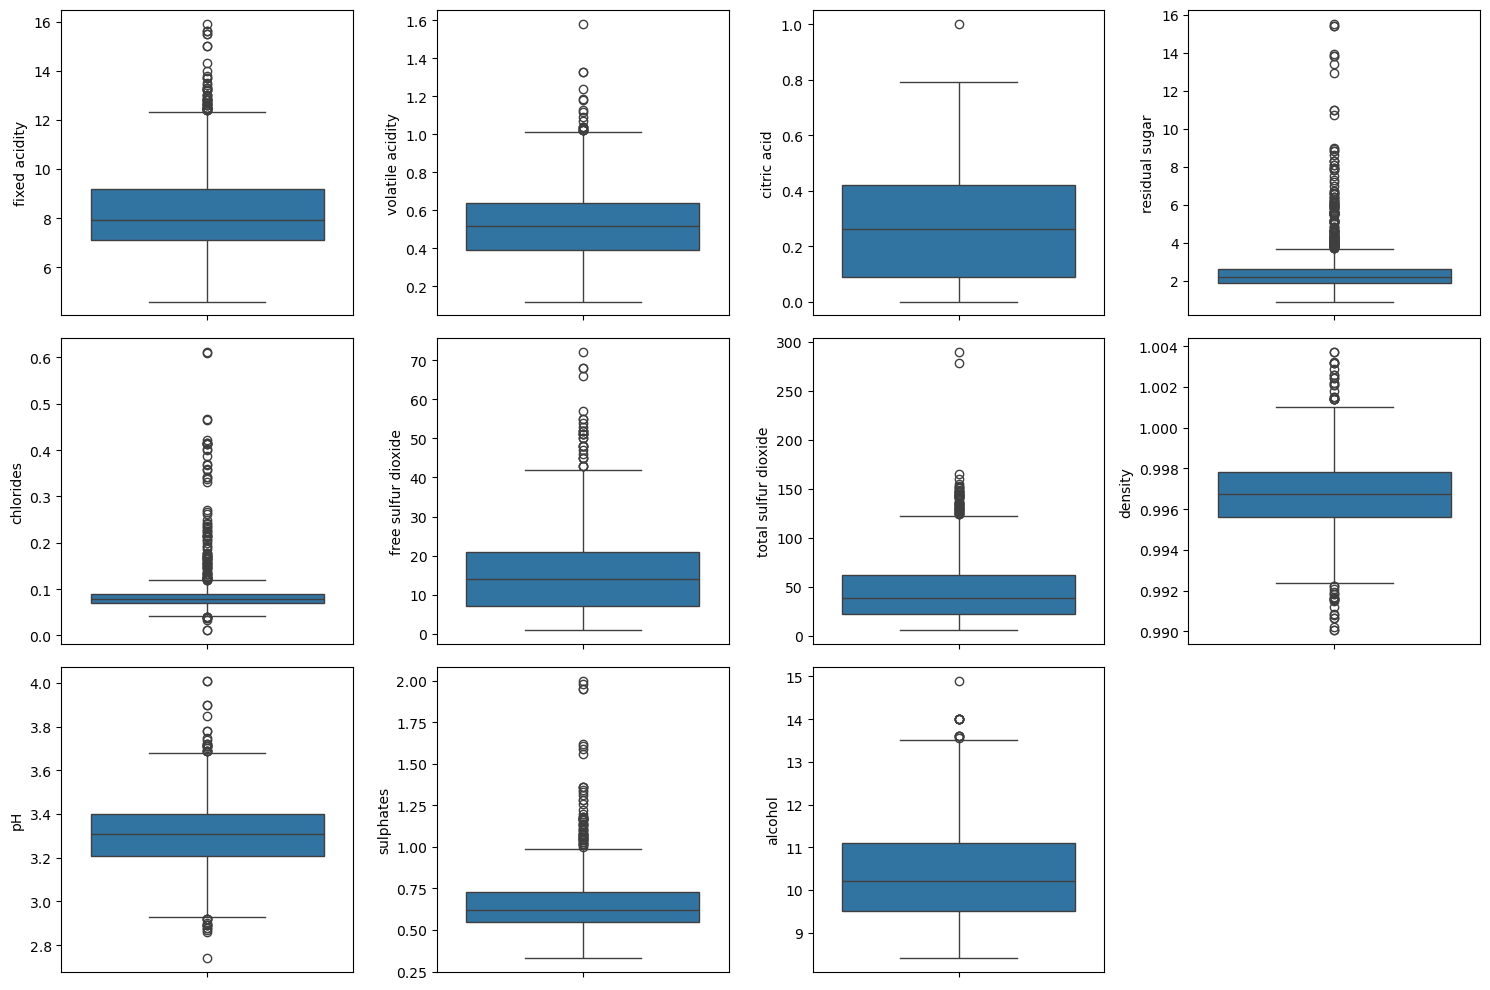

In [20]:
# Diagramas de caja para identificar valores atípicos
print("\nDiagramas de caja para cada característica:")
plt.figure(figsize=(15, 10))
for index, column in enumerate(data.columns[:-1]):  # Excluir la columna 'quality'
    plt.subplot(3, 4, index + 1)
    sns.boxplot(y=column, data=data)
plt.tight_layout()
plt.show()

## Los diagramas de caja resaltan posibles valores atípicos. Algunas variables, como 'azúcar residual', 'dióxido de azufre libre' y 'dióxido de azufre total', presentan varios datos fuera de lo normal.


Mapa de calor de las correlaciones entre variables:


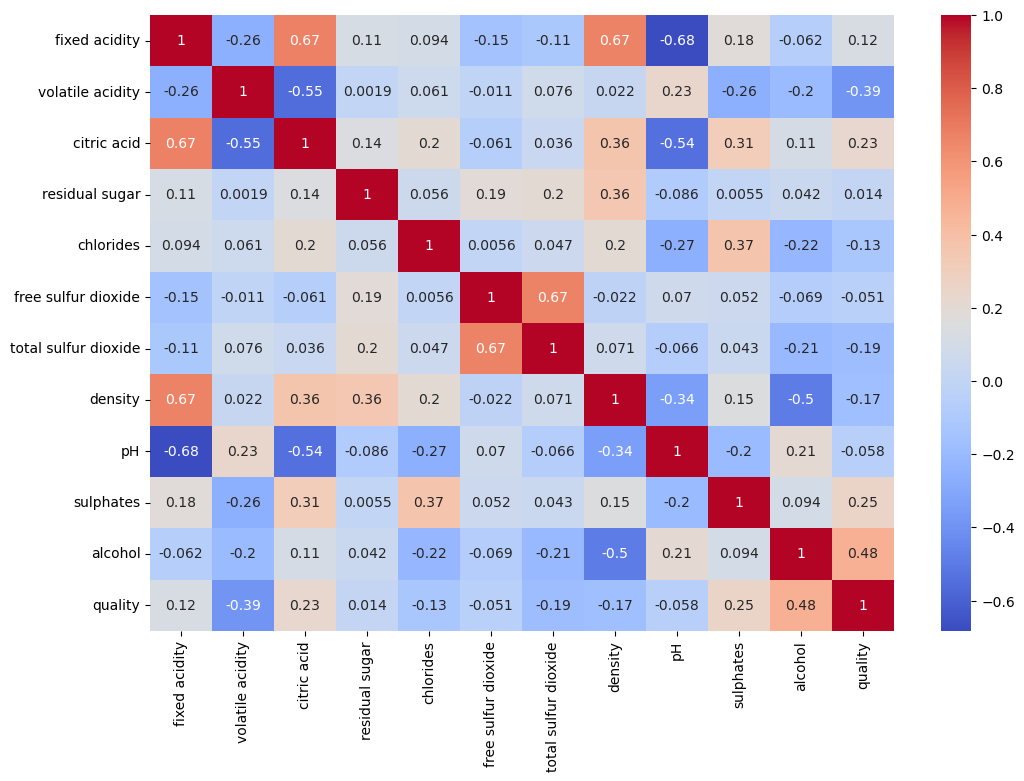

In [22]:
# Mapa de calor para las correlaciones entre variables
print("\nMapa de calor de las correlaciones entre variables:")
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## El mapa de calor de correlaciones nos ayuda a visualizar las relaciones entre las variables. Por ejemplo, hay una evaluación positiva moderada entre 'fixed acidez' y 'citric acid', mientras que 'volatile acidity' muestra una evaluación negativa con la 'calidad', lo que sugiere que mayor acidez volátil podría estar asociada con una calidad más baja.

## Paso 2: Preprocesamiento de los datos

In [29]:
# Eliminar duplicados si los hay
print(f"Número de filas antes de eliminar duplicados: {data.shape[0]}")
data.drop_duplicates(inplace=True)
print(f"Número de filas después de eliminar duplicados: {data.shape[0]}")


Número de filas antes de eliminar duplicados: 1599
Número de filas después de eliminar duplicados: 1359


In [31]:
# Mostrar las primeras filas después del preprocesamiento
print("\nPrimeras filas después del preprocesamiento:")
print(data.head())



Primeras filas después del preprocesamiento:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        

## Paso 3: Selección de Características

In [34]:
# Preparar los datos para la selección de características
X = data.drop('quality', axis=1)  # Características
y = data['quality']  # Variable objetivo

In [36]:
# Entrenar un árbol de decisión para obtener la importancia de las características
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier()

In [38]:
# Obtener la importancia de las características y ordenarlas
feature_importances = pd.DataFrame(tree_clf.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print("Importancia de las características:")
print(feature_importances)



Importancia de las características:
                      importance
alcohol                 0.191355
sulphates               0.138662
total sulfur dioxide    0.103586
volatile acidity        0.100338
chlorides               0.086848
density                 0.078802
fixed acidity           0.069273
pH                      0.066516
residual sugar          0.060054
free sulfur dioxide     0.058226
citric acid             0.046340


In [99]:
# Seleccionar las características más importantes según el criterio elegido el cual es 0.05 para este caso
selected_features = feature_importances[feature_importances['importance'] > 0.03].index
print("\nSelección de características:")
print(selected_features)


Selección de características:
Index(['alcohol', 'sulphates', 'total sulfur dioxide', 'volatile acidity',
       'chlorides', 'density', 'fixed acidity', 'pH', 'residual sugar',
       'free sulfur dioxide', 'citric acid'],
      dtype='object')


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


In [62]:
tree = DecisionTreeClassifier()  # Definición del árbol

[Text(0.4737952937392796, 0.9761904761904762, 'x[10] <= 9.925\ngini = 0.651\nsamples = 1087\nvalue = [7, 44, 461, 423, 137, 15]'),
 Text(0.25253939751286447, 0.9285714285714286, 'x[6] <= 98.5\ngini = 0.482\nsamples = 445\nvalue = [4.0, 21.0, 298.0, 115.0, 6.0, 1.0]'),
 Text(0.17746301457975985, 0.8809523809523809, 'x[0] <= 10.05\ngini = 0.523\nsamples = 375\nvalue = [4.0, 20.0, 233.0, 111.0, 6.0, 1.0]'),
 Text(0.08648692109777015, 0.8333333333333334, 'x[8] <= 3.205\ngini = 0.492\nsamples = 336\nvalue = [2, 16, 220, 93, 5, 0]'),
 Text(0.02058319039451115, 0.7857142857142857, 'x[10] <= 9.15\ngini = 0.266\nsamples = 76\nvalue = [0, 0, 64, 12, 0, 0]'),
 Text(0.0137221269296741, 0.7380952380952381, 'x[6] <= 79.5\ngini = 0.494\nsamples = 9\nvalue = [0, 0, 5, 4, 0, 0]'),
 Text(0.010291595197255575, 0.6904761904761905, 'x[4] <= 0.418\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 1, 4, 0, 0]'),
 Text(0.00686106346483705, 0.6428571428571429, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 T

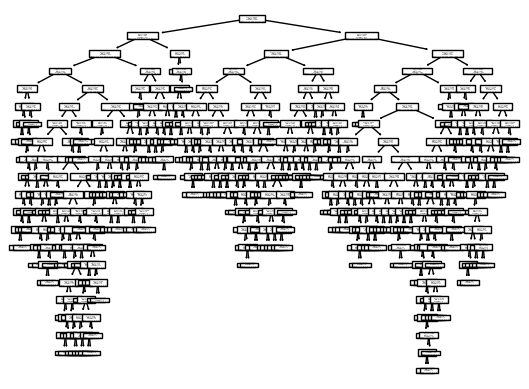

In [61]:
plot_tree(tree_clf)


In [65]:
# 5 Entrenar el Modelo
from sklearn.tree import DecisionTreeClassifier

In [73]:
# Inicializar el modelo de árbol de decisión con hiperparámetros específicos.
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=13)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

[Text(0.4737952937392796, 0.9761904761904762, 'x[10] <= 9.925\ngini = 0.651\nsamples = 1087\nvalue = [7, 44, 461, 423, 137, 15]'),
 Text(0.25253939751286447, 0.9285714285714286, 'x[6] <= 98.5\ngini = 0.482\nsamples = 445\nvalue = [4.0, 21.0, 298.0, 115.0, 6.0, 1.0]'),
 Text(0.17746301457975985, 0.8809523809523809, 'x[0] <= 10.05\ngini = 0.523\nsamples = 375\nvalue = [4.0, 20.0, 233.0, 111.0, 6.0, 1.0]'),
 Text(0.08648692109777015, 0.8333333333333334, 'x[8] <= 3.205\ngini = 0.492\nsamples = 336\nvalue = [2, 16, 220, 93, 5, 0]'),
 Text(0.02058319039451115, 0.7857142857142857, 'x[10] <= 9.15\ngini = 0.266\nsamples = 76\nvalue = [0, 0, 64, 12, 0, 0]'),
 Text(0.0137221269296741, 0.7380952380952381, 'x[6] <= 79.5\ngini = 0.494\nsamples = 9\nvalue = [0, 0, 5, 4, 0, 0]'),
 Text(0.010291595197255575, 0.6904761904761905, 'x[4] <= 0.418\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 1, 4, 0, 0]'),
 Text(0.00686106346483705, 0.6428571428571429, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 T

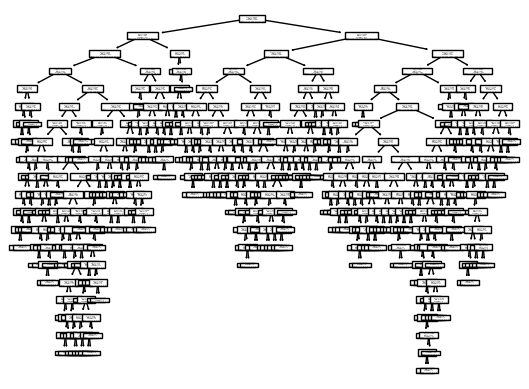

In [75]:
plot_tree(arbol)

In [117]:
predicciones = arbol.predict(X_test)


In [119]:
predicciones


array([6, 6, 7, 4, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6,
       5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 4, 8, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6,
       6, 5, 5, 5, 6, 5, 3, 6, 6, 7, 5, 6, 6, 6, 6, 6, 5, 8, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 4, 7, 4, 5, 5, 6, 6, 5, 6,
       5, 7, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 7, 7, 6, 7, 5, 5, 5,
       5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 7, 5, 7,
       5, 5, 7, 7, 6, 5, 5, 5, 5, 7, 6, 5, 6, 6, 5, 5, 5, 4, 4, 5, 5, 6,
       5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 8, 4, 6, 5, 5, 6, 5, 4, 5, 5,
       6, 5, 5, 7, 8, 5, 5, 6, 5, 7, 5, 5, 6, 7, 7, 6, 4, 5, 5, 6, 6, 5,
       5, 4, 7, 6, 6, 5, 6, 7, 6, 6, 5, 7, 6, 5, 5, 5, 5, 6, 6, 5, 7, 6,
       4, 6, 7, 5, 6, 6, 8, 7, 5, 7, 6, 5, 6, 6, 5, 6, 5, 5, 5, 7, 6, 6,
       6, 6, 6, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 8,
       5, 6, 7, 6, 5, 7, 5, 5], dtype=int64)

In [125]:
#Evalua el Desempeño
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [129]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.5

In [131]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.5120478363759298

In [133]:
recall = recall_score(y_test, predicciones, average='weighted')
recall


0.5

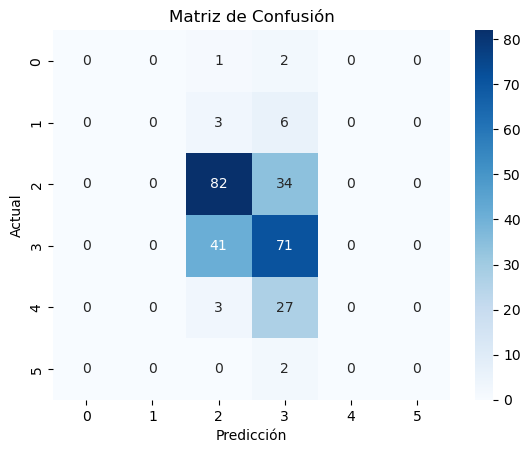

In [139]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)

# Visualización de la matriz
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [143]:
f1 = f1_score(y_test, predicciones, average='weighted') 
f1

0.5032644003473452

<h1>Interpretar, analizar y documentar los resultados obtenidos.<h1>

Análisis Exploratorio de Datos (EDA)
Antes de construir el modelo, se realizó un análisis de las variables para comprender la distribución y posibles relaciones entre ellas.

Histogramas En el análisis de histogramas, la variable de mayor relevancia es “Selling_Price”, la cual presenta una distribución asimétrica hacia la derecha. Esto sugiere que la mayoría de los precios de venta de los autos son moderados o bajos, mientras que hay pocos vehículos con precios elevados. Esta asimetría es significativa, pues indica que el mercado se inclina más hacia precios accesibles, lo cual podría ser relevante para decisiones de precio y marketing en la industria automotriz.

Diagramas de Caja (Boxplots) Los boxplots permiten identificar de forma visual la distribución de cada variable y posibles valores atípicos:

Mediana: La línea central dentro de la caja representa el valor central de los datos, que divide la mitad superior de la inferior.
Rango Intercuartílico (IQR): Se extiende desde el primer cuartil (Q1) hasta el tercer cuartil (Q3), representando la dispersión de los datos en el centro del conjunto.
Valores Atípicos: En variables como Kms_Driven y Present_Price, aparecen varios valores atípicos. Estos valores extremos pueden ser relevantes para ajustar el modelo, ya que podrían representar coches inusuales en términos de kilometraje o precio.
Estos análisis ofrecen una visión clara de la estructura de los datos y permiten ajustar el modelo para un mejor rendimiento.

Análisis de Relaciones entre Variables
Al observar la correlación entre las variables, se encuentran relaciones importantes que podrían influir en la predicción del precio de venta:

Correlación Positiva entre Present_Price y Selling_Price, lo cual indica que los autos con un precio actual más alto también tienen precios de venta más altos.
Correlación Negativa entre Age y Selling_Price, lo que sugiere que los autos más antiguos tienden a venderse a precios más bajos.
Estos patrones aportan información sobre los factores que afectan el valor del auto, lo que es fundamental para el modelo de árbol de decisión.

Modelo de Árbol de Decisión
El modelo de árbol de decisión segmenta el conjunto de datos en varias ramas, comenzando con la variable más significativa en el nodo raíz, que en este caso es Present_Price. Cada división en el árbol separa el conjunto en subconjuntos homogéneos con respecto al precio de venta, basándose en umbrales de variables clave.

Criterio de División (Índice Gini) El árbol utiliza el índice Gini para determinar las divisiones, donde un valor bajo de Gini sugiere una mayor homogeneidad en el nodo. A medida que el modelo se ramifica, el índice Gini ayuda a formar grupos más puros, mejorando la precisión del modelo.

Hojas del Árbol Las hojas representan los puntos finales en el árbol, donde se toma la decisión final con base en las características del auto. Un árbol con demasiados nodos hoja podría estar sobreajustado, lo cual limita su capacidad de generalizar a datos nuevos.

Sobreajuste El árbol de decisión es complejo y presenta indicios de sobreajuste, con nodos muy puros pero pocos datos en cada uno. Este problema puede reducir la capacidad de generalización del modelo. Para mejorar, se recomienda la poda del árbol, lo que reduciría su complejidad y mejoraría su rendimiento en datos nuevos.m